# Image clustering

8 bit - 256 color

![](pics/pic1.png)

![](pics/pic2.png)

In [37]:
options(jupyter.plot_mimetypes = 'image/png')

In [2]:
flower = read.csv("data/flower.csv", header=FALSE)
str(flower)

'data.frame':	50 obs. of  50 variables:
 $ V1 : num  0.0991 0.0991 0.1034 0.1034 0.1034 ...
 $ V2 : num  0.112 0.108 0.112 0.116 0.108 ...
 $ V3 : num  0.134 0.116 0.121 0.116 0.112 ...
 $ V4 : num  0.138 0.138 0.121 0.121 0.112 ...
 $ V5 : num  0.138 0.134 0.125 0.116 0.112 ...
 $ V6 : num  0.138 0.129 0.121 0.108 0.112 ...
 $ V7 : num  0.129 0.116 0.103 0.108 0.112 ...
 $ V8 : num  0.116 0.103 0.103 0.103 0.116 ...
 $ V9 : num  0.1121 0.0991 0.1078 0.1121 0.1164 ...
 $ V10: num  0.121 0.108 0.112 0.116 0.125 ...
 $ V11: num  0.134 0.125 0.129 0.134 0.129 ...
 $ V12: num  0.147 0.134 0.138 0.129 0.138 ...
 $ V13: num  0.000862 0.146552 0.142241 0.142241 0.133621 ...
 $ V14: num  0.000862 0.000862 0.142241 0.133621 0.12931 ...
 $ V15: num  0.142 0.142 0.134 0.121 0.116 ...
 $ V16: num  0.125 0.125 0.116 0.108 0.108 ...
 $ V17: num  0.1121 0.1164 0.1078 0.0991 0.0991 ...
 $ V18: num  0.108 0.112 0.108 0.108 0.108 ...
 $ V19: num  0.121 0.129 0.125 0.116 0.116 ...
 $ V20: num  0.138 0.12

In [3]:
# changing data to matrix:
flowerMatrix = as.matrix(flower)
str(flowerMatrix)

 num [1:50, 1:50] 0.0991 0.0991 0.1034 0.1034 0.1034 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:50] "V1" "V2" "V3" "V4" ...


# Perform clustering

In [4]:
flowerVector = as.vector(flowerMatrix)
str(flowerVector)

 num [1:2500] 0.0991 0.0991 0.1034 0.1034 0.1034 ...


In [6]:
flowerVector2 = as.vector(flower)
str(flowerVector2)
# Thus, above step is a crucial step!!!

'data.frame':	50 obs. of  50 variables:
 $ V1 : num  0.0991 0.0991 0.1034 0.1034 0.1034 ...
 $ V2 : num  0.112 0.108 0.112 0.116 0.108 ...
 $ V3 : num  0.134 0.116 0.121 0.116 0.112 ...
 $ V4 : num  0.138 0.138 0.121 0.121 0.112 ...
 $ V5 : num  0.138 0.134 0.125 0.116 0.112 ...
 $ V6 : num  0.138 0.129 0.121 0.108 0.112 ...
 $ V7 : num  0.129 0.116 0.103 0.108 0.112 ...
 $ V8 : num  0.116 0.103 0.103 0.103 0.116 ...
 $ V9 : num  0.1121 0.0991 0.1078 0.1121 0.1164 ...
 $ V10: num  0.121 0.108 0.112 0.116 0.125 ...
 $ V11: num  0.134 0.125 0.129 0.134 0.129 ...
 $ V12: num  0.147 0.134 0.138 0.129 0.138 ...
 $ V13: num  0.000862 0.146552 0.142241 0.142241 0.133621 ...
 $ V14: num  0.000862 0.000862 0.142241 0.133621 0.12931 ...
 $ V15: num  0.142 0.142 0.134 0.121 0.116 ...
 $ V16: num  0.125 0.125 0.116 0.108 0.108 ...
 $ V17: num  0.1121 0.1164 0.1078 0.0991 0.0991 ...
 $ V18: num  0.108 0.112 0.108 0.108 0.108 ...
 $ V19: num  0.121 0.129 0.125 0.116 0.116 ...
 $ V20: num  0.138 0.12

## Hierarchical Clustering

In [7]:
distance = dist(flowerVector, method = "euclidean")

In [14]:
clusterIntensity = hclust(distance, method = "ward.D")

In [11]:
str(distance)

Class 'dist'  atomic [1:3123750] 0 0.00431 0.00431 0.00431 0.01293 ...
  ..- attr(*, "Size")= int 2500
  ..- attr(*, "Diag")= logi FALSE
  ..- attr(*, "Upper")= logi FALSE
  ..- attr(*, "method")= chr "euclidean"
  ..- attr(*, "call")= language dist(x = flowerVector, method = "euclidean")


In [13]:
2500*(2499)/2

[1] 3123750

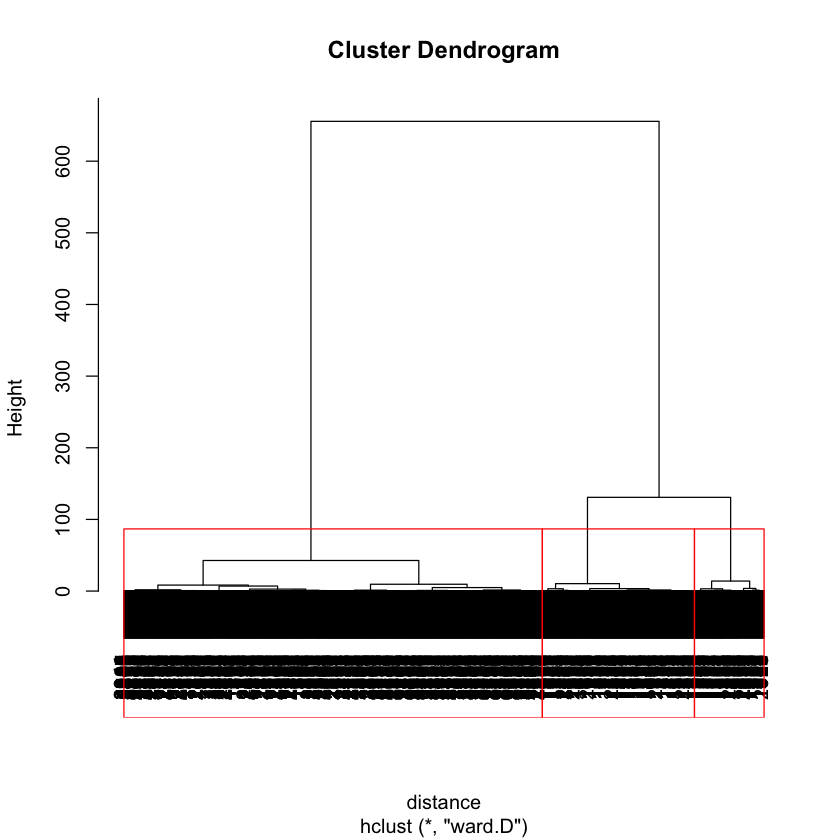

In [38]:
plot(clusterIntensity)
# visulize the cuts:
rect.hclust(clusterIntensity, k = 3, border="red")

In [19]:
flowerClusters = cutree(clusterIntensity, k = 3)

In [21]:
str(flowerClusters)

 int [1:2500] 1 1 1 1 1 1 1 1 1 1 ...


In [22]:
tapply(flowerVector, flowerClusters, mean)

1          2          3 
0.08574315 0.50826255 0.93147713

In [25]:
str(flowerClusters)

 int [1:50, 1:50] 1 1 1 1 1 1 1 1 1 1 ...


## see the result:

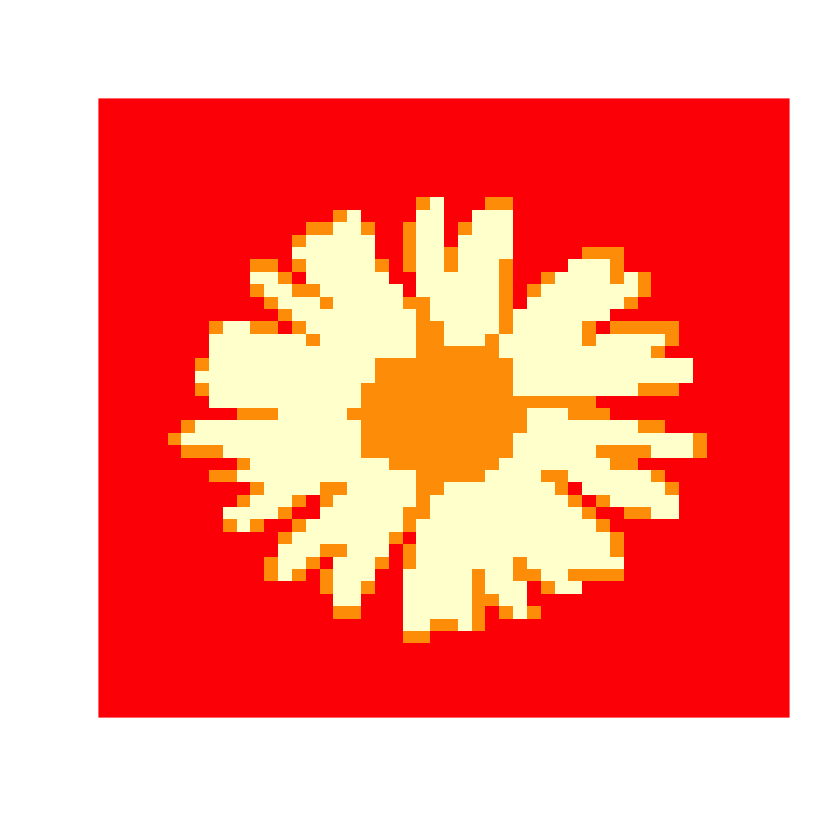

In [39]:
dim(flowerClusters) = c(50, 50)
image(flowerClusters, axes=FALSE)

In [26]:
str(flowerMatrix)

 num [1:50, 1:50] 0.0991 0.0991 0.1034 0.1034 0.1034 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:50] "V1" "V2" "V3" "V4" ...


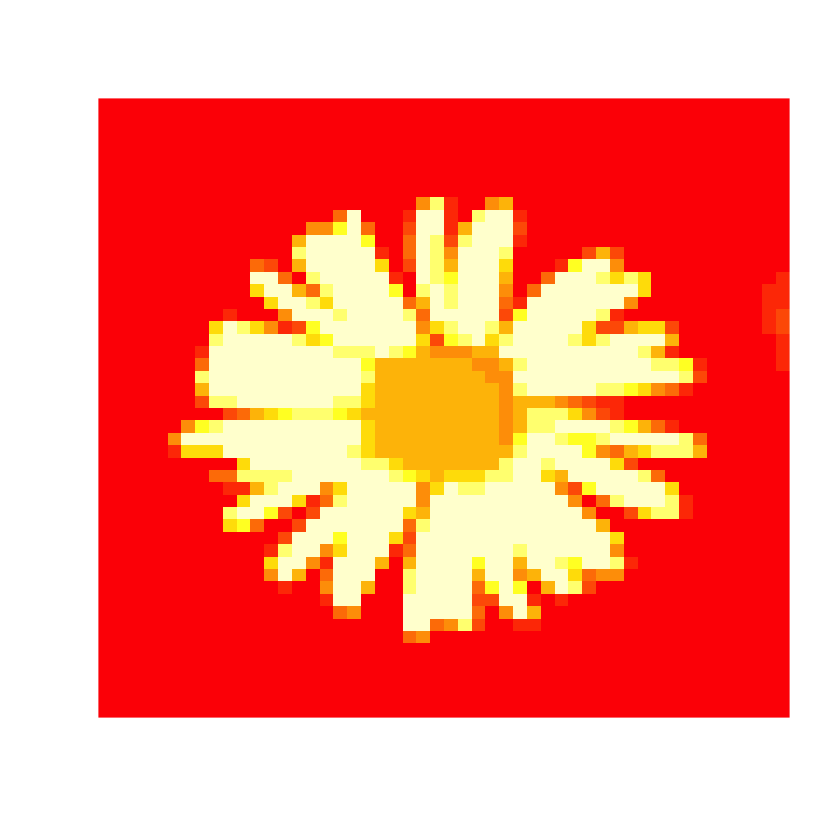

In [40]:
image(flowerMatrix, axes=FALSE)

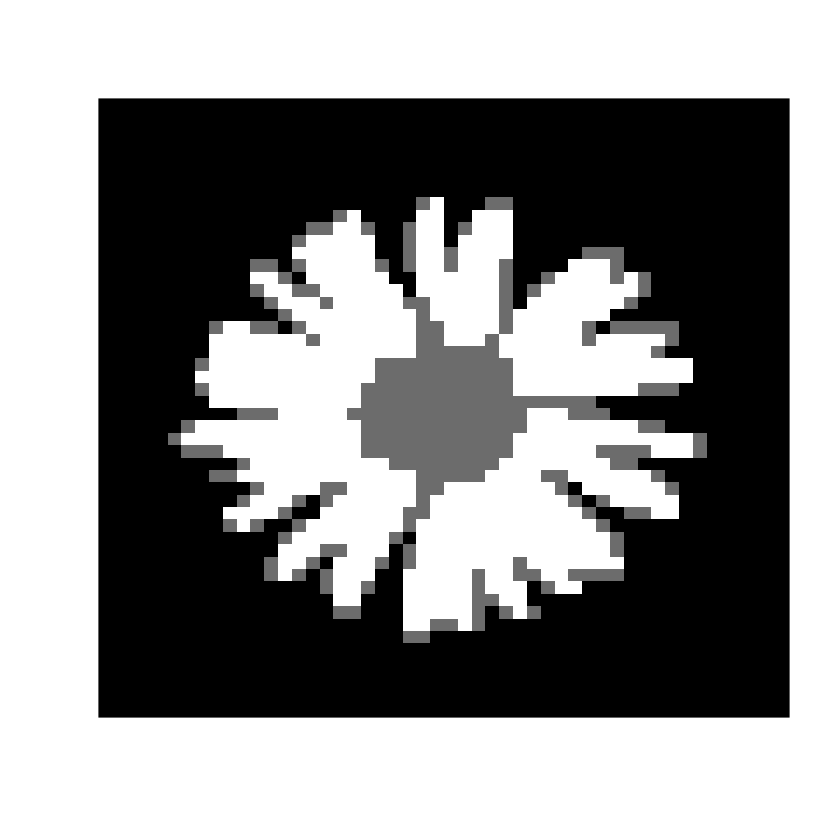

In [41]:
image(flowerClusters, axes=FALSE, col = grey(seq(0,1,length=256)))

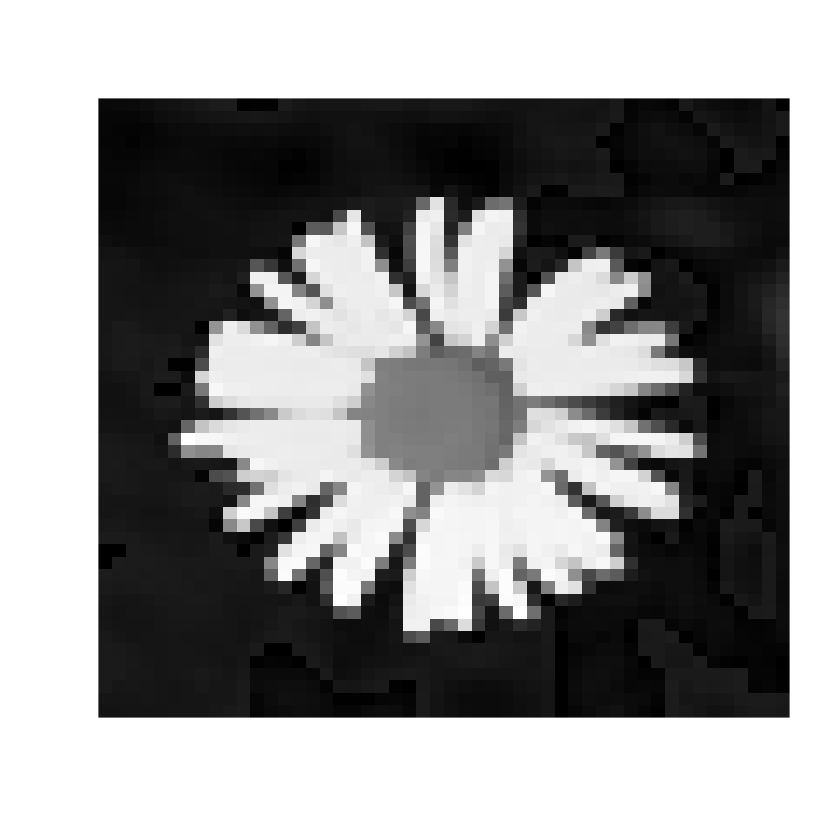

In [42]:
image(flowerMatrix, axes=FALSE, col = grey(seq(0,1,length=256)))

# Brain - Healthy Image:

In [29]:
healthy = read.csv("data/healthy.csv", header = FALSE)
healthyMatrix = as.matrix(healthy)
healthyVector = as.vector(healthyMatrix)

In [30]:
str(healthyMatrix)

 num [1:566, 1:646] 0.00427 0.00855 0.01282 0.01282 0.01282 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:646] "V1" "V2" "V3" "V4" ...


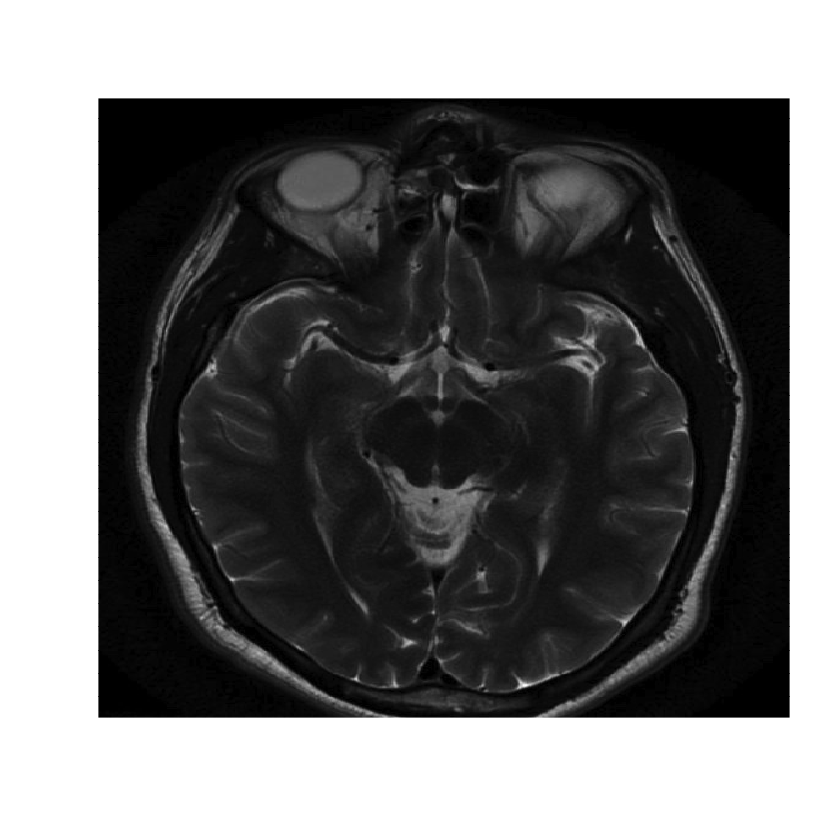

In [43]:
image(healthyMatrix, axes=FALSE, col = grey(seq(0,1,length=256)))

In [33]:
# distance = dist(healthyVector, method = "euclidean")
# Above method may cause memory not enough error
str(healthyVector)

 num [1:365636] 0.00427 0.00855 0.01282 0.01282 0.01282 ...


In [35]:
n=length(healthyVector)

In [36]:
n*(n-1) / 2

[1] 66844659430

## Too big, let's use k-means

In [44]:
k=5
set.seed(1)
KMC = kmeans(healthyVector, centers=k, iter.max = 1000)

In [45]:
str(KMC)

List of 9
 $ cluster     : int [1:365636] 3 3 3 3 3 3 3 3 3 3 ...
 $ centers     : num [1:5, 1] 0.4818 0.1062 0.0196 0.3094 0.1842
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : NULL
 $ totss       : num 5775
 $ withinss    : num [1:5] 96.6 47.2 39.2 57.5 62.3
 $ tot.withinss: num 303
 $ betweenss   : num 5472
 $ size        : int [1:5] 20556 101085 133162 31555 79278
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [46]:
healthyClusters = KMC$cluster

In [47]:
KMC$centers

1,0.4817719
2,0.1061945
3,0.01961886
4,0.3094283
5,0.1842058


In [48]:
KMC$size

[1]  20556 101085 133162  31555  79278

In [49]:
dim(healthyClusters) = c(nrow(healthyMatrix), ncol(healthyMatrix))

In [50]:
str(healthyClusters)

 int [1:566, 1:646] 3 3 3 3 3 3 3 3 3 3 ...


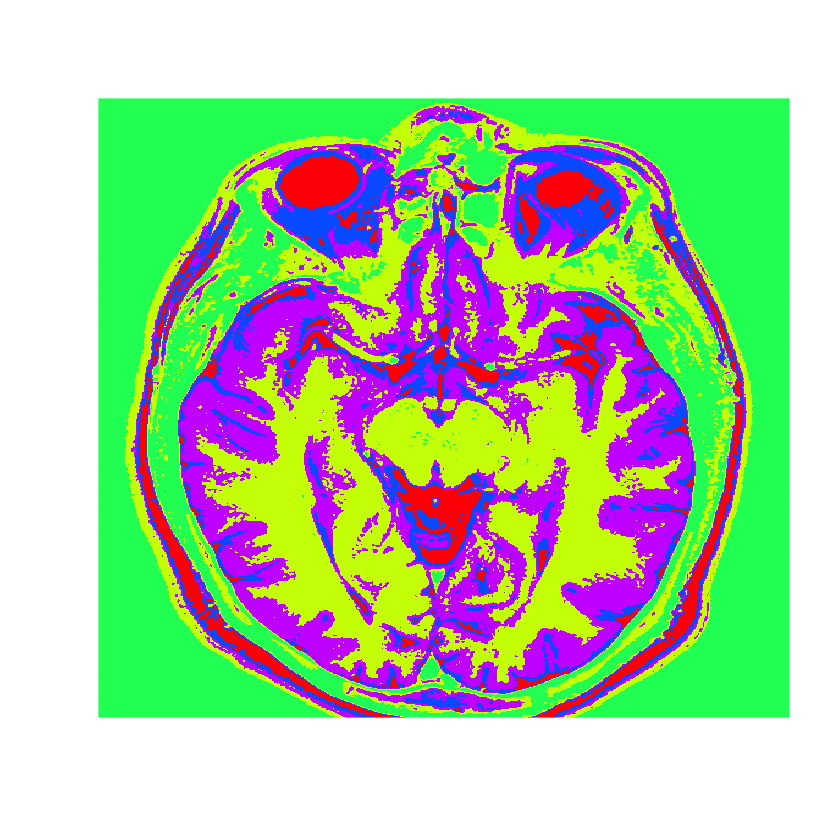

In [52]:
image(healthyClusters, axes=FALSE, col = rainbow(k))

# Brain - Tumor Image:

In [53]:
tumor = read.csv("data/tumor.csv", header = FALSE)
tumorMatrix = as.matrix(tumor)
tumorVector = as.vector(tumorMatrix)

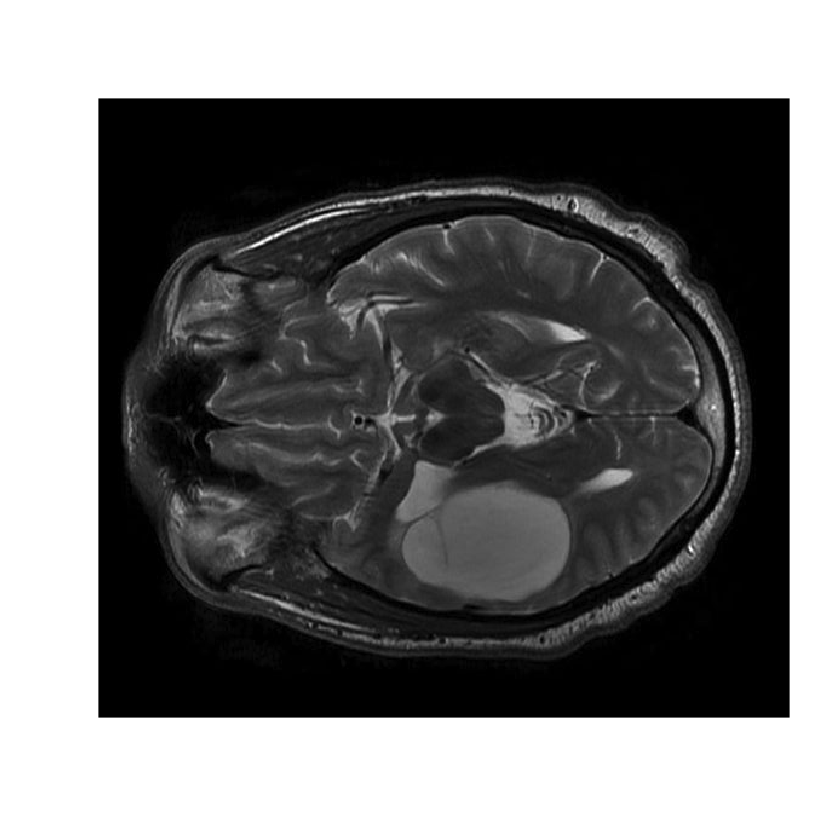

In [79]:
image(tumorMatrix, axes=FALSE, col = grey(seq(0,1,length=256)))

In [54]:
# Not running clustering again
# KMC = kmeans(tumorVector, centers=k, iter.max = 1000)
# To do this, we need library flexclust
# install.packages("flexclust")
library(flexclust)
# Has KCCA - K-Centroids Cluster Analysis

Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Loading required package: stats4


In [55]:
# data conversion, preprare for using KCCA
KMC.kcca = as.kcca(KMC, healthyVector)

In [69]:
tumorClusters = predict(KMC.kcca, newdata = tumorVector)
healthyClustersP = predict(KMC.kcca, newdata = healthyVector)

In [76]:
dim(tumorClusters) = c(nrow(tumorMatrix), ncol(tumorMatrix))
dim(healthyClustersP) = c(nrow(healthyMatrix), ncol(healthyMatrix))

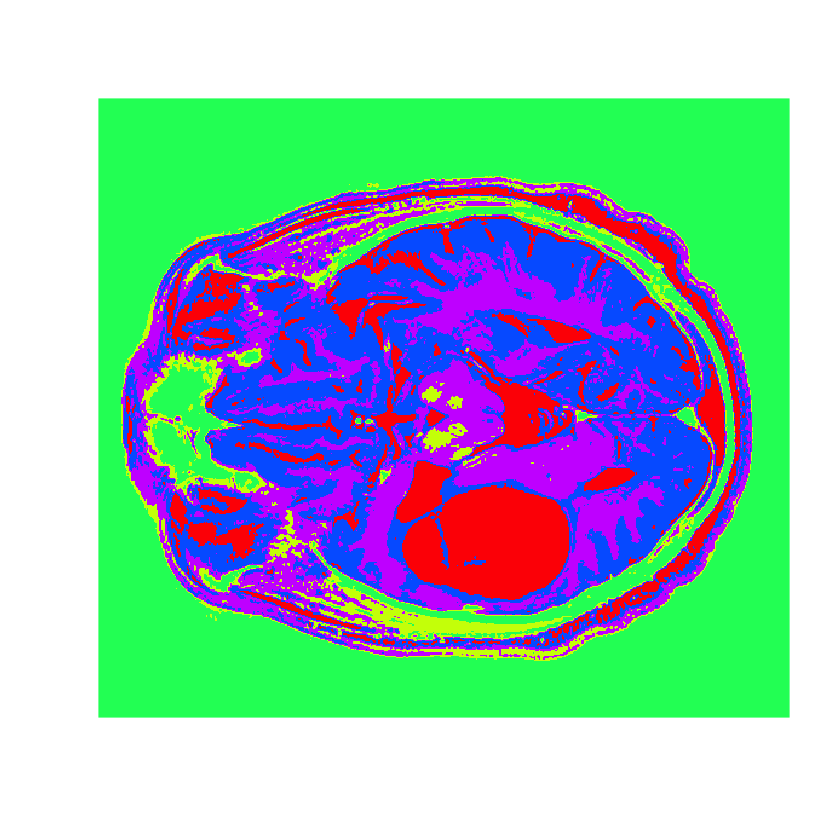

In [77]:
image(tumorClusters, axes=FALSE, col = rainbow(k))

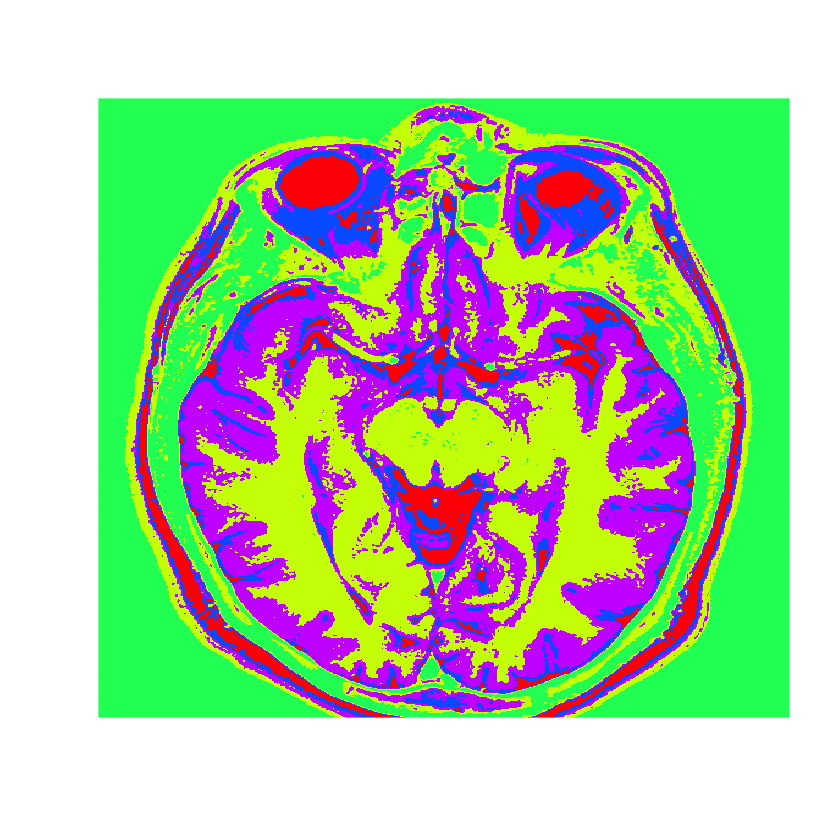

In [78]:
image(healthyClustersP, axes=FALSE, col = rainbow(k))

![](pics/comparison1.png)

![](pics/comparison2.png)

![](pics/comparison3.png)